In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,r2_score

In [2]:
df = pd.read_csv('uber.csv')
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [3]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

In [4]:
df.dropna(inplace=True)

In [5]:
df.isnull().sum()

Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [6]:
df['pickup_datetime']= pd.to_datetime(df['pickup_datetime'])
df['hour']= df['pickup_datetime'].dt.hour
df['day_of_week']= df['pickup_datetime'].dt.dayofweek

In [7]:
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06+00:00,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56+00:00,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00+00:00,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21+00:00,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00+00:00,-73.925023,40.744085,-73.973082,40.761247,5,17,3


In [8]:
df.drop(columns=['pickup_datetime','key'], inplace=True)

In [9]:
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3


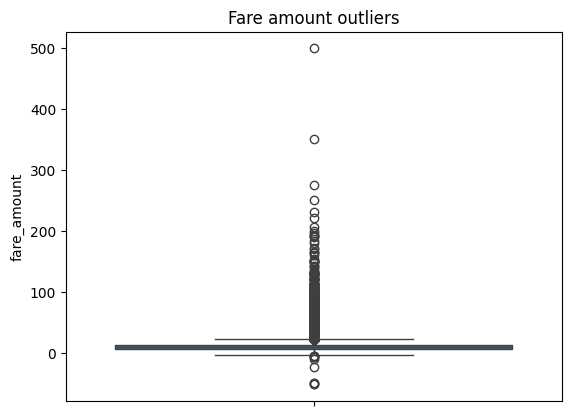

In [10]:
sns.boxplot(df['fare_amount'])
plt.title('Fare amount outliers')
plt.show()

In [11]:
df=df[df['fare_amount']<=100]
df.head()

,Unnamed: 0,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day_of_week
0,24238194,7.5,-73.999817,40.738354,-73.999512,40.723217,1,19,3
1,27835199,7.7,-73.994355,40.728225,-73.994710,40.750325,1,20,4
2,44984355,12.9,-74.005043,40.740770,-73.962565,40.772647,1,21,0
3,25894730,5.3,-73.976124,40.790844,-73.965316,40.803349,3,8,4
4,17610152,16.0,-73.925023,40.744085,-73.973082,40.761247,5,17,3


In [12]:
df.info

<bound method DataFrame.info of         Unnamed: 0  fare_amount  pickup_longitude  pickup_latitude  \
0         24238194          7.5        -73.999817        40.738354   
1         27835199          7.7        -73.994355        40.728225   
2         44984355         12.9        -74.005043        40.740770   
3         25894730          5.3        -73.976124        40.790844   
4         17610152         16.0        -73.925023        40.744085   
...            ...          ...               ...              ...   
199995    42598914          3.0        -73.987042        40.739367   
199996    16382965          7.5        -73.984722        40.736837   
199997    27804658         30.9        -73.986017        40.756487   
199998    20259894         14.5        -73.997124        40.725452   
199999    11951496         14.1        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  hour  \
0              -73.999512         40.723217              

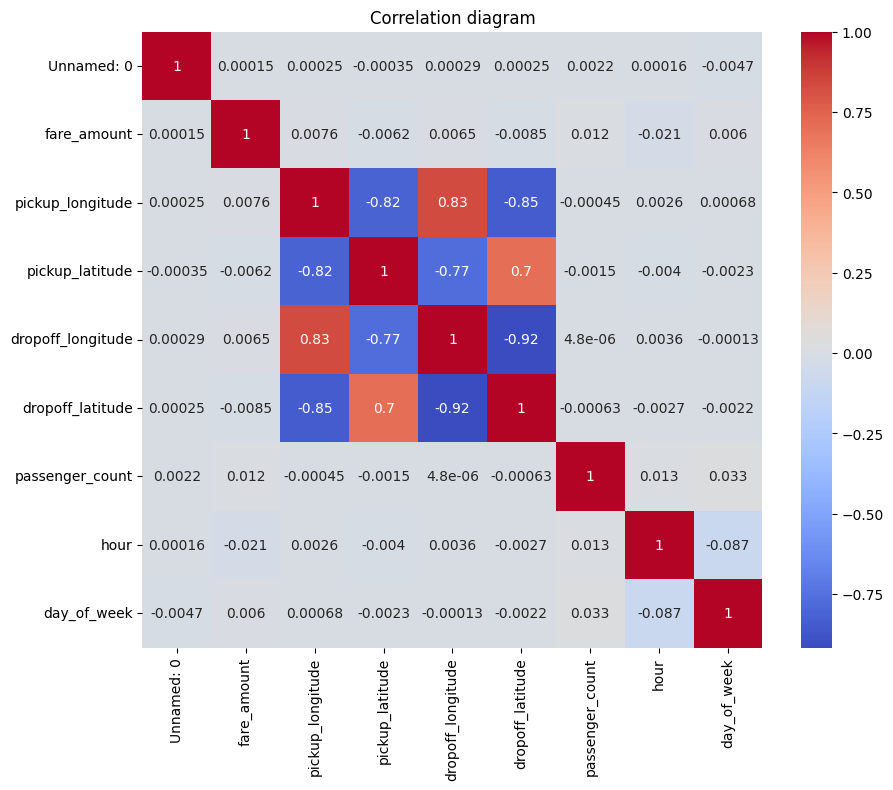

In [13]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation diagram")
plt.show()

In [14]:
X= df.drop('fare_amount', axis=1)
Y=df['fare_amount']

In [15]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [16]:
linear_model= LinearRegression()
linear_model.fit(X_train,Y_train)

y_pred=linear_model.predict(X_test)
rmse_score= np.sqrt(mean_squared_error(Y_test,y_pred))

print("RMSE",rmse_score)

RMSE 9.457435502797468


In [17]:
ran_forest = RandomForestRegressor(random_state=42)
ran_forest.fit(X_train,Y_train)
y_pred=ran_forest.predict(X_test)
rmse_score= np.sqrt(mean_squared_error(Y_test,y_pred))
print("RMSE",rmse_score)

RMSE 4.21298131731257


In [19]:
r2_score_ans= r2_score(Y_test,y_pred)
print(r2_score_ans)

0.8016146469232412
